# Exploring Feature Libraries with Additional ODE's

This notebook serves as a workthrough of additional ODE's. It will also serve to explore some of the different [`feature libraries`](https://pysindy.readthedocs.io/en/latest/api/pysindy.feature_library.html) of PySINDy and how they affect model matching.

The ODE's in this notebook can be found [here](https://pysindy.readthedocs.io/en/latest/_modules/pysindy/utils/odes.html#lorenz_u). The functions themselves were predefined, but the rest of the code in this exploration is original.

In [1]:
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

## Van der Pol ODE

The Van der Pol ODE is a non-conservative oscillator with non-linear damping. Its magnitude should increase in time.

In [2]:
def van_der_pol(t, x, p=[0.5]):
    return [x[1], p[0] * (1 - x[0] ** 2) * x[1] - x[0]]

In [3]:
x0 = 0.1
y0 = 0

dt = 0.01
t_train = np.arange(0,10,dt)
t_span = (t_train[0],t_train[-1])
x0_train = [x0,y0]

x_train = solve_ivp(van_der_pol,t_span,
                   x0_train,t_eval=t_train,**integrator_keywords).y.T

optimizer = ps.STLSQ(threshold=0.05)

Below, three different feature libraries will be examined over a short period of time. In the following steps, we will see how they affect the the acuracy of the SINDy model.

The first library to be tested will be the **Fourier Library**. This returns a model in the comprised of trigonometric functions.

In [4]:
library = ps.FourierLibrary()

In [5]:
model = ps.SINDy(
    optimizer = optimizer,
    feature_library=library,
)

In [6]:
model.fit(x_train,t=dt)
model.print()

(x0)' = 1.058 sin(1 x1)
(x1)' = -1.075 sin(1 x0) + -0.229 cos(1 x0) + 0.413 sin(1 x1) + 0.231 cos(1 x1)


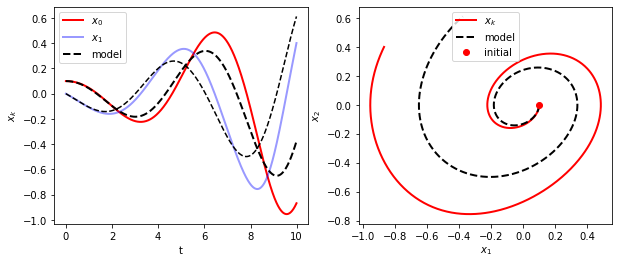

In [7]:
x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].plot(x0,y0,"ro",label="initial")
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

In reference to the above figures, it appears that the **Fourier Library** does not fit the data well. The model created, using this library, is represented by the dashed lines. According to the graph on the left, it appears as though the peaks do not increase nearly as fast as the actual equation. Looking at the graph on the right, it appears that the model spiral is just a little tighter than that of the true case.

---

The next library that will be used is the **Identity Library**

In [8]:
library = ps.IdentityLibrary()

In [9]:
model = ps.SINDy(
    optimizer = optimizer,
    feature_library=library,
)

In [10]:
model.fit(x_train,t=dt)
model.print()

(x0)' = 1.000 x1
(x1)' = -1.026 x0 + 0.420 x1


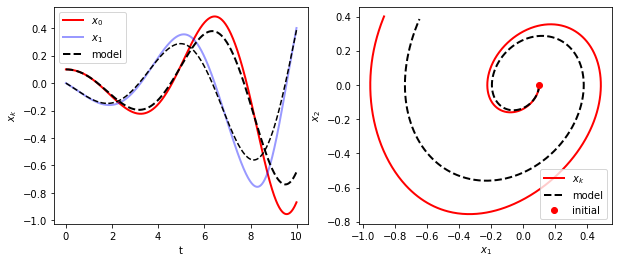

In [11]:
x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].plot(x0,y0,"ro",label="initial")
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

This library performed slightly better than the previous one in following the governing equations. According to the graph on the left, it appears that the model does not increase the peak intensities as fast as the governing equation. The graph on the right starts to diverge almost immediately as it moves on from the initial condition. The shape however, appears to resemble the theoretical equation slightly more accurately.

---

The last library that will be used is the **Polynomial Library**, which is usually the best one to use for ODE's.

In [12]:
library = ps.PolynomialLibrary(degree=5)

In [13]:
model = ps.SINDy(
    optimizer = optimizer,
    feature_library=library,
)

In [14]:
model.fit(x_train,t=dt)
model.print()

(x0)' = 1.000 x1
(x1)' = -1.000 x0 + 0.500 x1 + -0.500 x0^2 x1


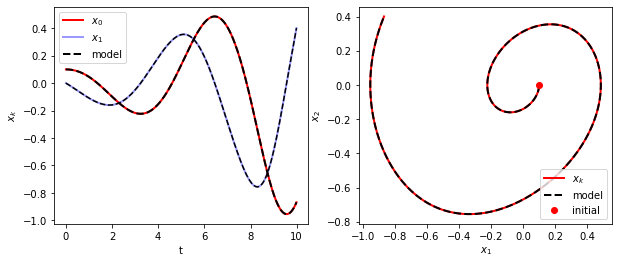

In [15]:
x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].plot(x0,y0,"ro",label="initial")
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

In reference to the graphs above, it appears that the **Polynomial Library** is the most accurate way to create the model. It appears that there is no deviation from the original governing equation.

---

## Duffing ODE

The Duffing Equation is a non-linear second-order differential equation. Since this is a damped oscillator, the intesnity value should decrease over time.

In [16]:
def duffing(t, x, p=[0.2, 0.05, 1]):
    return [x[1], -p[0] * x[1] - p[1] * x[0] - p[2] * x[0] ** 3]

In [17]:
x0 = 1
y0 = 0

dt = 0.01
t_train = np.arange(0,15,dt)
t_span = (t_train[0],t_train[-1])
x0_train = [x0,y0]

x_train = solve_ivp(duffing,t_span,
                   x0_train,t_eval=t_train,**integrator_keywords).y.T

optimizer = ps.STLSQ(threshold=0.05)

Following the same format as the previous example, we will examine the **Fourier Library** first.

In [18]:
library = ps.FourierLibrary()

In [19]:
model = ps.SINDy(
    optimizer = optimizer,
    feature_library=library,
)

In [20]:
model.fit(x_train,t=dt)
model.print()

(x0)' = 1.038 sin(1 x1)
(x1)' = -0.506 sin(1 x0) + 0.397 cos(1 x0) + -0.134 sin(1 x1) + -0.362 cos(1 x1)


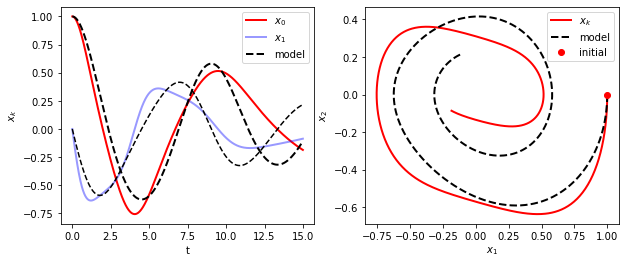

In [21]:
x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].plot(x0,y0,"ro",label="initial")
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

In the graph on the right, the model (dashed line) is more rounded than the true equation. Since the Duffing Osciallator is a second order ODE, the decrease in peak intensity does not change uniformly like it does in a Simple Harmonic Oscillator. While in the graph on the left, the model looks as though the peaks are delayed in time compared to the governing equation.

---

Following the same order as the previous example, the next library will be the **Identity Library**.

In [22]:
library = ps.IdentityLibrary()

In [23]:
model = ps.SINDy(
    optimizer = optimizer,
    feature_library=library,
)

In [24]:
model.fit(x_train,t=dt)
model.print()

(x0)' = 1.000 x1
(x1)' = -0.489 x0 + -0.172 x1


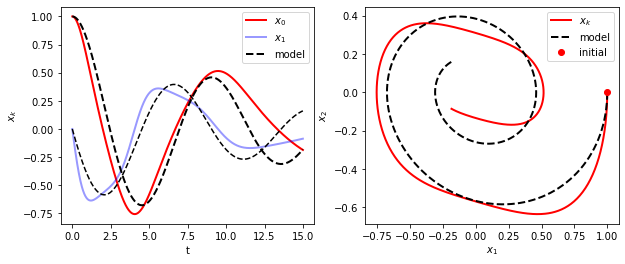

In [25]:
x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].plot(x0,y0,"ro",label="initial")
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

This model seems to do a better job at fitting the data. Although not perfect, the overall shape is closer to that of the true equations in both graphs.

---

Finally, the last library that will be used is the **Polynomial Library**.

In [26]:
library = ps.PolynomialLibrary(degree=5)

In [27]:
model = ps.SINDy(
    optimizer = optimizer,
    feature_library=library,
)

In [28]:
model.fit(x_train,t=dt)
model.print()

(x0)' = 1.000 x1
(x1)' = -0.050 x0 + -0.200 x1 + -1.000 x0^3


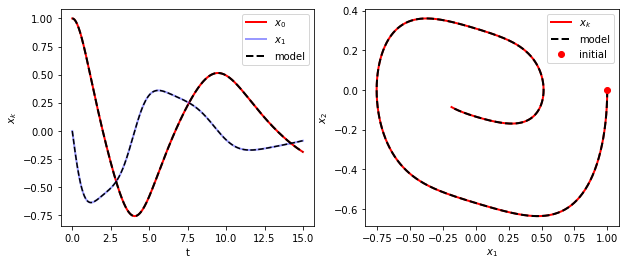

In [29]:
x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].plot(x0,y0,"ro",label="initial")
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

As expected, this Feature Library does the best job of the three that were explored as it fits the governing equations perfectly.

---

### Recap

Although each Feature Library has its own benefits for different kinds of data. The model that works best for ODE's is the **Polynomial Model**. However, it is important to understand that each of these libraries are important and can be used for different applications.